# 네비게이션, 소비추이 연관 분석

[사용 데이터]
- 네비게이션 데이터 : 2022년 1년간의 총 검색건수를 기준으로 분석 진행 예정 -> 세부적으로 필요하다면, 월별 데이터를 수집해놓았기 때문에, 이를 함께 분석할 예정
- 소비추이 데이터 : 관광소비 추이, 업종별 지출액, 지역별 지출액에 관한 데이터가 담겨 있음

[분석 내용]
- 서울, 제주도 별 관광지 명단 500개를 가져오고, 분류별로 어떻게 이루어져 있는지를 시각화, 이를 통해서 서울, 제주도 지역별로 왜 해당 지역의 소비 비중이 높은지 등 분석해보기


In [35]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # 경고 무시

from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.set_palette('pastel')

In [2]:
# 네비게이션 데이터 경로 설정
filepath = '/Users/leeshinhaeng/Desktop/수업자료/데분프/데이터파일'
filelist = os.listdir(filepath)

In [3]:
filelist

['서울시 2022년 지역별 관광지 검색순위.xlsx',
 '.DS_Store',
 '제주시 2022년 내국인 관광소비 추이',
 '서울시 2022년 내국인 관광소비 추이',
 '서울시 2022년 지역별 관광지 검색순위 월별',
 '서울시 2022년 외국인 관광소비 추이',
 '제주시 2022년 외국인 관광소비 추이',
 '제주시 2022년 지역별 관광지 검색순위 월별',
 '제주시 2022년 지역별 관광지 검색순위.xlsx']

In [5]:
# 2022년 네비게이션 데이터 불러오기
fn1 = '서울시 2022년 지역별 관광지 검색순위.xlsx'
seoul_nav = pd.read_excel(filepath + '/' + fn1)
fn2 = '제주시 2022년 지역별 관광지 검색순위.xlsx'
jeju_nav = pd.read_excel(filepath + '/' + fn2)

In [6]:
# 내국인 소비추이 데이터 경로 설정
filepath2 = '/Users/leeshinhaeng/Desktop/수업자료/데분프/데이터파일/내국인 관광소비, 지출액'
filelist = os.listdir(filepath2)

In [7]:
filelist

['제주시내국인_지역별 지출액.xlsx',
 '서울시내국인_관광소비 추이.xlsx',
 '서울시내국인_지역별 지출액.xlsx',
 '제주시내국인_관광소비 추이.xlsx',
 '서울시내국인_업종별 지출액.xlsx',
 '제주시내국인_업종별 지출액.xlsx']

In [10]:
seoul_ts = pd.read_excel(filepath2 + '/' + '서울시내국인_관광소비 추이.xlsx',header=1) # 관광소비
seoul_ps = pd.read_excel(filepath2 + '/' + '서울시내국인_지역별 지출액.xlsx',header=1) # 지역별 지출
seoul_ws = pd.read_excel(filepath2 + '/' + '서울시내국인_업종별 지출액.xlsx',header=1) # 업종별 지출

In [13]:
jeju_ts = pd.read_excel(filepath2 + '/' + '제주시내국인_관광소비 추이.xlsx',header=1) # 관광소비
jeju_ps = pd.read_excel(filepath2 + '/' + '제주시내국인_지역별 지출액.xlsx',header=1) # 지역별 지출
jeju_ws = pd.read_excel(filepath2 + '/' + '제주시내국인_업종별 지출액.xlsx',header=1) # 업종별 지출

In [14]:
# 외국인 소비추이 데이터 경로 설정
filepath3 = '/Users/leeshinhaeng/Desktop/수업자료/데분프/데이터파일/외국인 관광소비, 지출액'
filelist = os.listdir(filepath3)

In [15]:
filelist

['서울시외국인_관광소비 추이.xlsx',
 '제주시외국인_지역별 지출액.xlsx',
 '서울시외국인_업종별 지출액.xlsx',
 '제주시외국인_업종별 지출액.xlsx',
 '제주시외국인_관광소비 추이.xlsx',
 '서울시외국인_지역별 지출액.xlsx']

In [16]:
seoul_foreign_ts = pd.read_excel(filepath3 + '/' + '서울시외국인_관광소비 추이.xlsx',header=1) # 관광소비
seoul_foreign_ps = pd.read_excel(filepath3 + '/' + '서울시외국인_지역별 지출액.xlsx',header=1) # 지역별 지출
seoul_foreign_ws = pd.read_excel(filepath3 + '/' + '서울시외국인_업종별 지출액.xlsx',header=1) # 업종별 지출

In [17]:
jeju_foreign_ts = pd.read_excel(filepath3 + '/' + '제주시외국인_관광소비 추이.xlsx',header=1) # 관광소비
jeju_foreign_ps = pd.read_excel(filepath3 + '/' + '제주시외국인_지역별 지출액.xlsx',header=1) # 지역별 지출
jeju_foreign_ws = pd.read_excel(filepath3 + '/' + '제주시외국인_업종별 지출액.xlsx',header=1) # 업종별 지출

## 데이터 결합

In [23]:
seoul_ts['내외국인'] = '내국인'
seoul_ps['내외국인'] = '내국인'
seoul_ws['내외국인'] = '내국인'

jeju_ts['내외국인'] = '내국인'
jeju_ps['내외국인'] = '내국인'
jeju_ws['내외국인'] = '내국인'

In [24]:
seoul_foreign_ts['내외국인'] = '외국인'
seoul_foreign_ps['내외국인'] = '외국인'
seoul_foreign_ws['내외국인'] = '외국인'

jeju_foreign_ts['내외국인'] = '외국인'
jeju_foreign_ps['내외국인'] = '외국인'
jeju_foreign_ws['내외국인'] = '외국인'

### 서울시, 제주시 중분류 카테고리 비교 시각화

In [33]:
# 서울시, 제주시 중분류 카테고리 비교 시각화
seoul_middle = seoul_nav.groupby(['중분류 카테고리'])[['검색건수']].count()
seoul_middle.reset_index(drop=False, inplace=True)
seoul_middle['지역'] = '서울'

jeju_middle = jeju_nav.groupby(['중분류 카테고리'])[['검색건수']].count()
jeju_middle.reset_index(drop=False, inplace=True)
jeju_middle['지역'] = '제주'

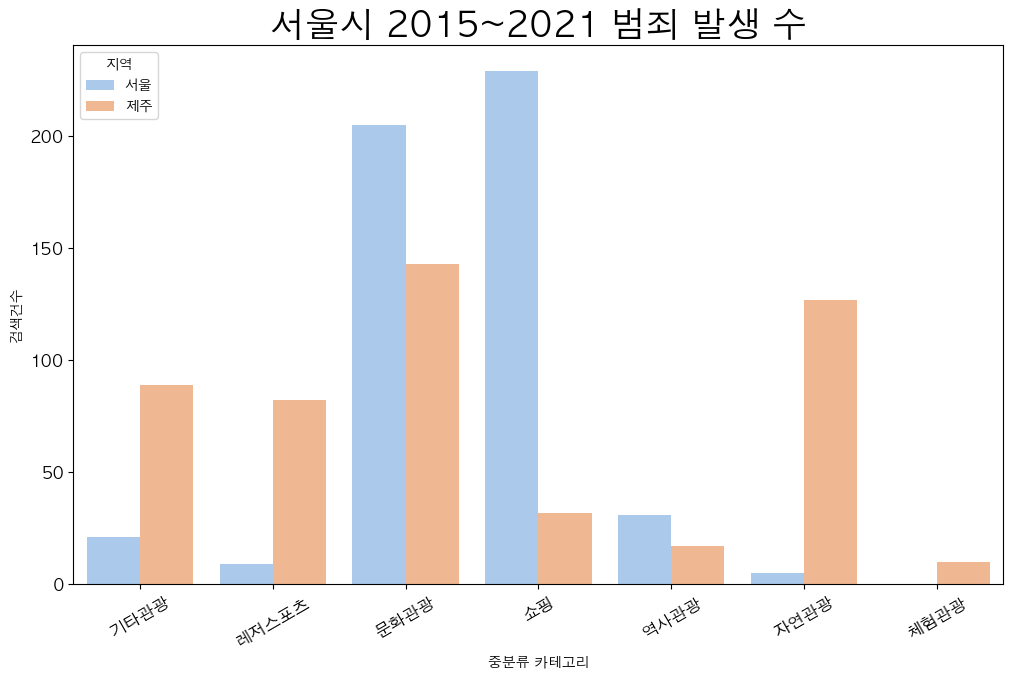

In [36]:
middle = pd.concat([seoul_middle, jeju_middle], axis = 0)

# 총발생횟수 비교
rcParams['figure.figsize'] = 12,7
sns.barplot(data = middle,
           x=middle['중분류 카테고리'],
           y=middle['검색건수'], hue='지역');
plt.title('서울, 제주 관광지 중분류 카테고리 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

### 서울시, 제주시 소분류 카테고리 시각화

In [53]:
# 검색건수 개수
gu_middle = seoul_nav.groupby(['시/군/구', '중분류 카테고리']).count()[['검색건수']]
gu_middle.reset_index(drop=False, inplace=True)

In [56]:
# 검색건수 합계
gu_middle_sum = seoul_nav.groupby(['시/군/구', '중분류 카테고리']).sum()[['검색건수']]
gu_middle_sum.reset_index(drop=False, inplace=True)

In [57]:
gu_middle['검색건수합계'] = gu_middle_sum['검색건수']

In [58]:
gu_middle

,시/군/구,중분류 카테고리,검색건수,검색건수합계
0,강남구,기타관광,2,274502
1,강남구,문화관광,20,1356159
2,강남구,쇼핑,8,1680716
3,강남구,역사관광,3,110249
4,강동구,문화관광,5,122461
...,...,...,...,...
79,중구,문화관광,11,322786
80,중구,쇼핑,29,1971977
81,중구,역사관광,3,40647
82,중랑구,문화관광,4,72958


### 지역별 네비게이션 수 비교

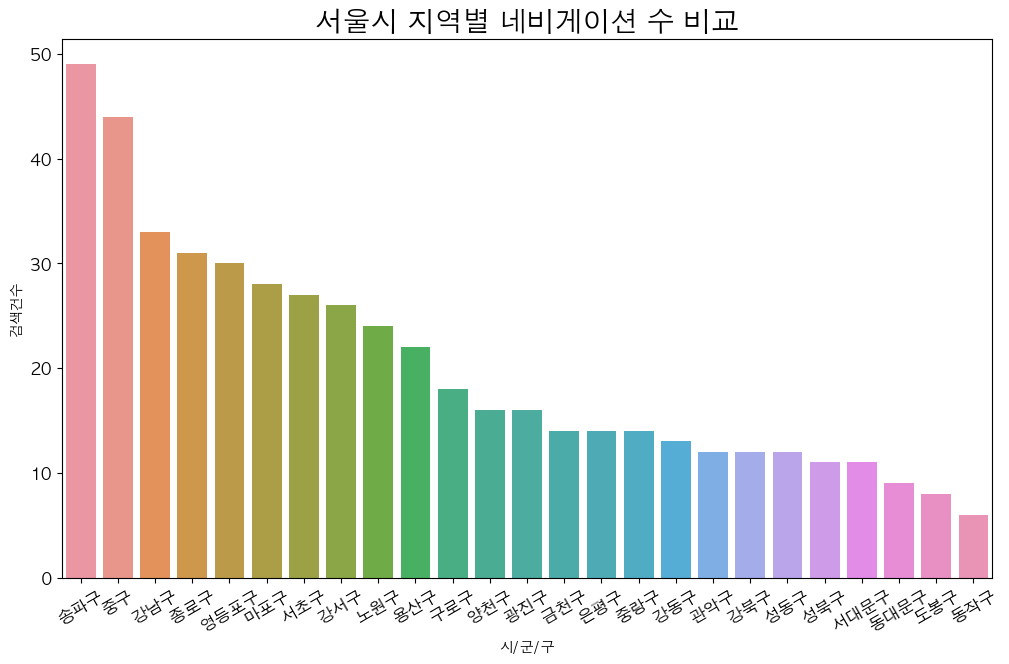

In [98]:
gu = seoul_nav.groupby(['시/군/구']).count()[['검색건수']]
gu.sort_values(by='검색건수', ascending=False, inplace=True)
# 총발생횟수 비교
rcParams['figure.figsize'] = 12,7
sns.barplot(data = gu,
           x=gu.index,
           y=gu['검색건수']);
plt.title('서울시 지역별 네비게이션 수 비교', size=20)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

#### 가장 상위 지표가 두드러졌던 송파구, 중구에 어떤 것들이 있는지 살펴보자

In [67]:
sj = gu_middle[(gu_middle['시/군/구']=='송파구') | (gu_middle['시/군/구']=='중구')]

송파구와 중구의 경우는 쇼핑의 비중이 상당히 높은 것으로 확인된다.

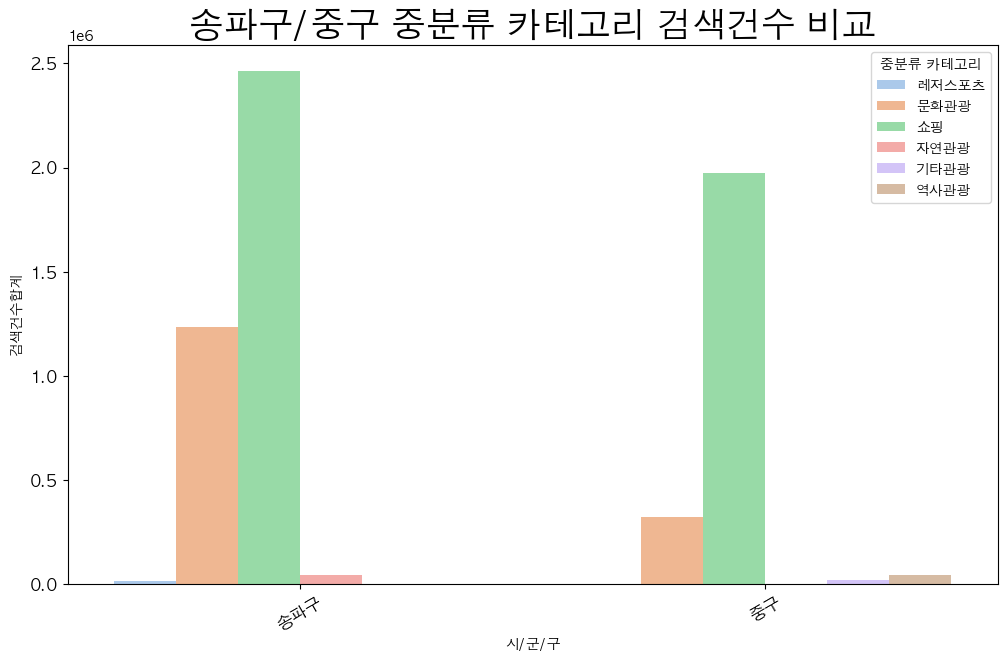

In [68]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = sj,
           x=sj['시/군/구'],
           y=sj['검색건수합계'], hue='중분류 카테고리');
plt.title('송파구/중구 중분류 카테고리 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

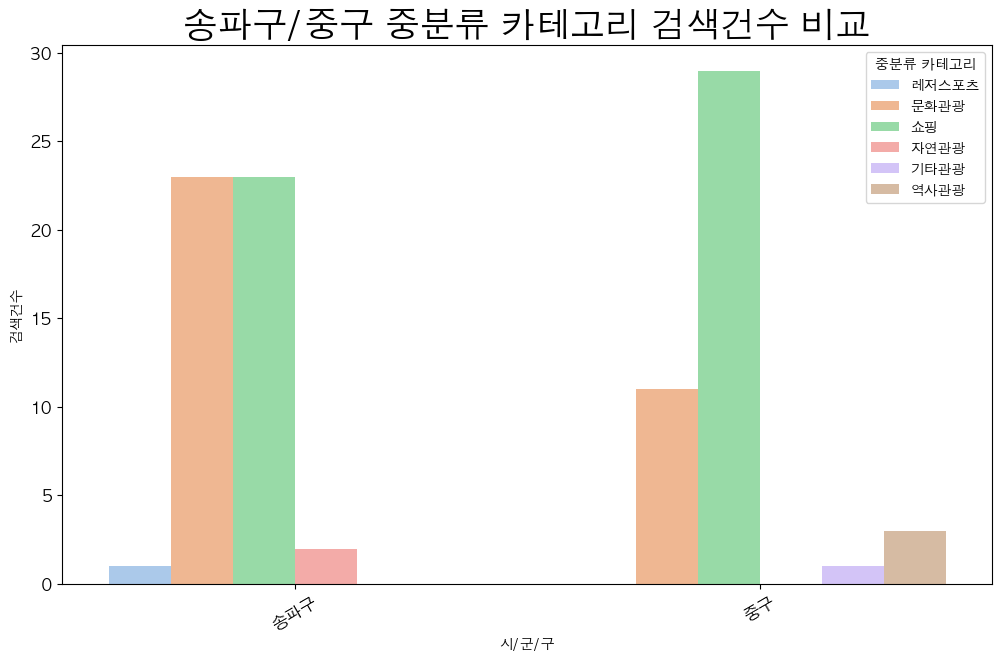

In [73]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = sj,
           x=sj['시/군/구'],
           y=sj['검색건수'], hue='중분류 카테고리');
plt.title('송파구/중구 중분류 카테고리 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

#### 그렇다면 하위 3곳은?

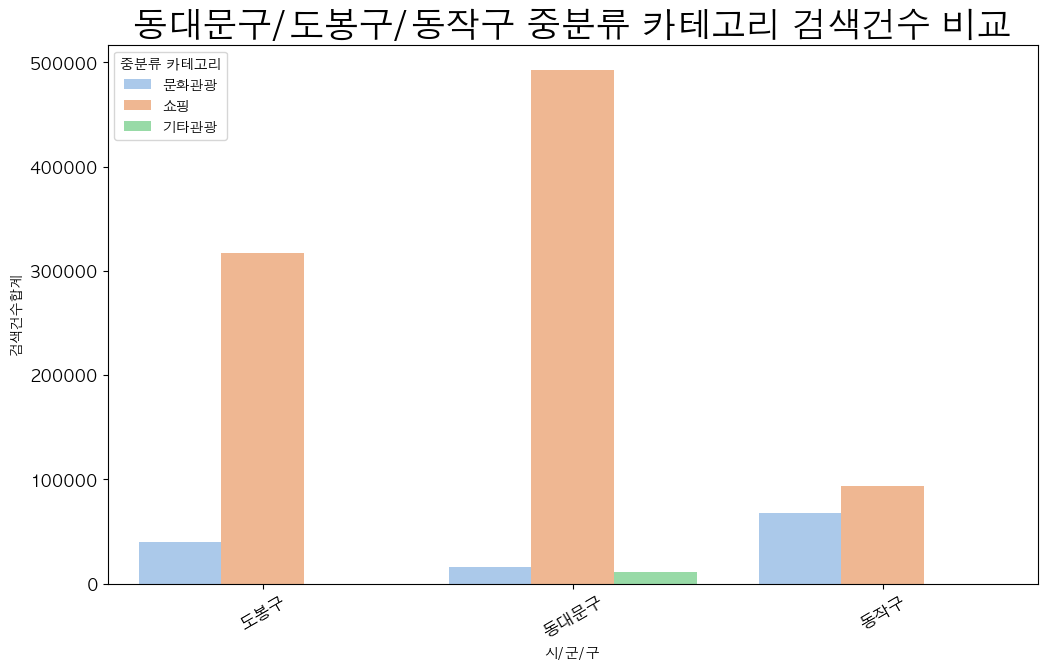

In [72]:
ddd = gu_middle[(gu_middle['시/군/구']=='동대문구') | (gu_middle['시/군/구']=='도봉구') | (gu_middle['시/군/구']=='동작구')]
rcParams['figure.figsize'] = 12,7
sns.barplot(data = ddd,
           x=ddd['시/군/구'],
           y=ddd['검색건수합계'], hue='중분류 카테고리');
plt.title('동대문구/도봉구/동작구 중분류 카테고리 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

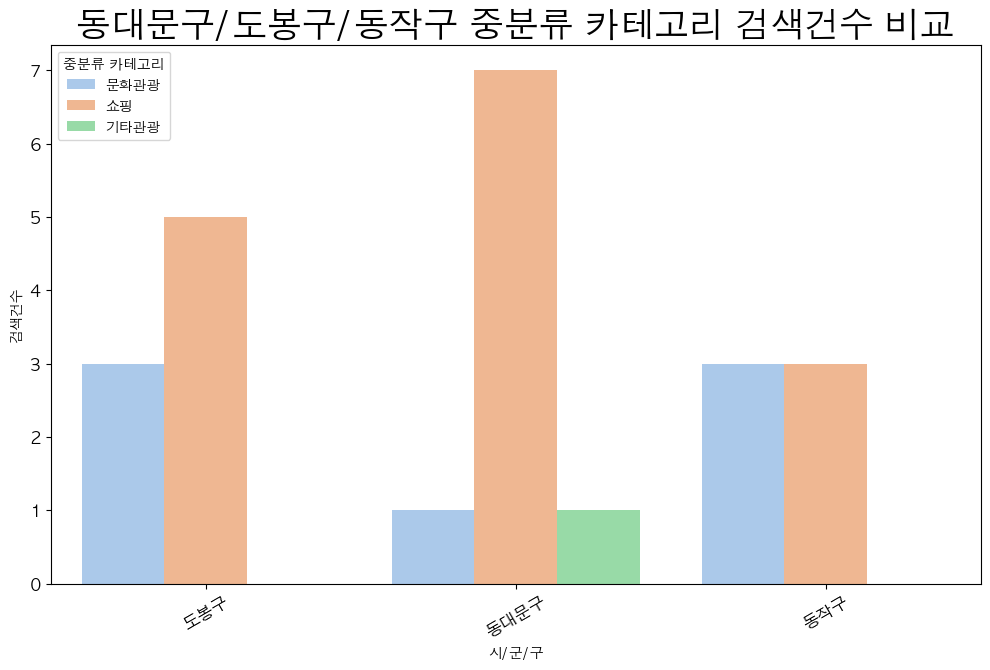

In [74]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = ddd,
           x=ddd['시/군/구'],
           y=ddd['검색건수'], hue='중분류 카테고리');
plt.title('동대문구/도봉구/동작구 중분류 카테고리 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

In [99]:
# 네비게이션 검색건수 대비 지출액 비교 (내국인기준)
gu['검색건수합계'] = gu_middle.groupby('시/군/구')[['검색건수합계']].sum()
gu.reset_index(inplace=True)
gu['내국인기초지자체지출액비율'] = seoul_ps['기초지자체 지출액 비율']
gu['외국인기초지자체지출액비율'] = seoul_foreign_ps['기초지자체 지출액 비율']

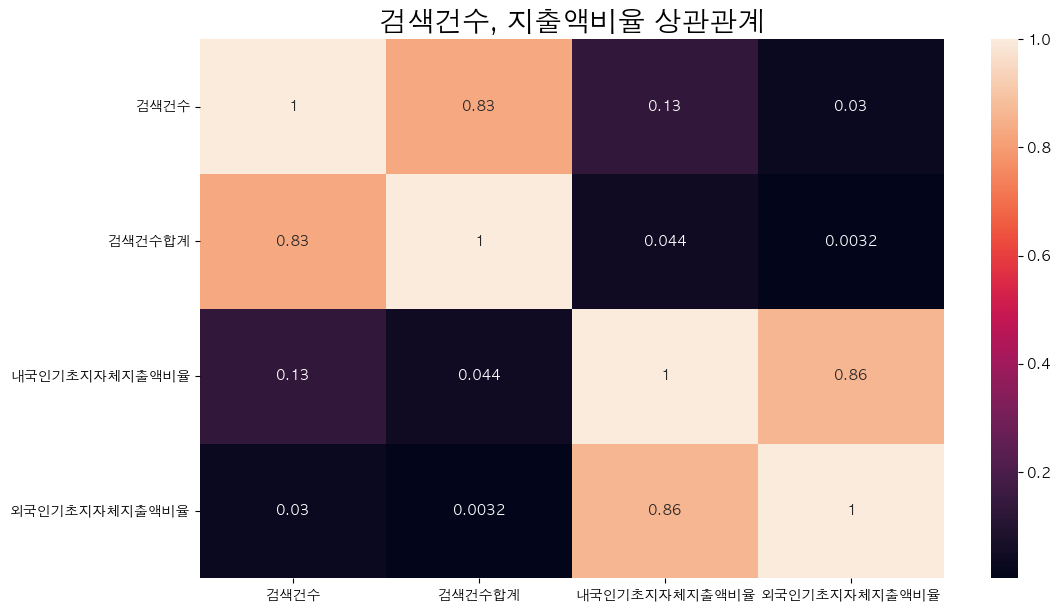

In [104]:
ax = sns.heatmap(gu.corr(), annot=True)
plt.title('검색건수, 지출액비율 상관관계', fontsize=20)
plt.show() 

#### 서울시 쇼핑 제외하고 상관관계 구하기

In [116]:
seoul_notshp = seoul_nav[seoul_nav['중분류 카테고리']!='쇼핑']
seoul_notshp.reset_index(inplace=True, drop=True)

In [121]:
gu_middle2 = seoul_notshp.groupby(['시/군/구', '중분류 카테고리']).count()[['검색건수']]
gu_middle2.reset_index(drop=False, inplace=True)

gu_middle_sum2 = seoul_notshp.groupby(['시/군/구', '중분류 카테고리']).sum()[['검색건수']]
gu_middle_sum2.reset_index(drop=False, inplace=True)

gu_middle2['검색건수합계'] = gu_middle_sum2['검색건수']

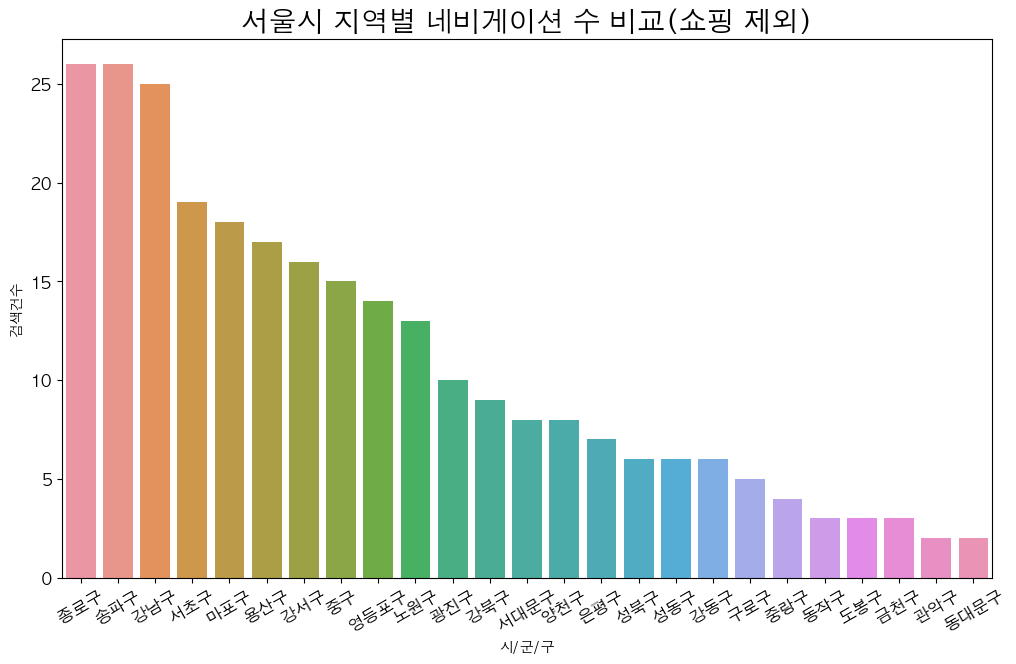

In [123]:
gu2 = seoul_notshp.groupby(['시/군/구']).count()[['검색건수']]
gu2.sort_values(by='검색건수', ascending=False, inplace=True)
# 총발생횟수 비교
rcParams['figure.figsize'] = 12,7
sns.barplot(data = gu2,
           x=gu2.index,
           y=gu2['검색건수']);
plt.title('서울시 지역별 네비게이션 수 비교(쇼핑 제외)', size=20)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()


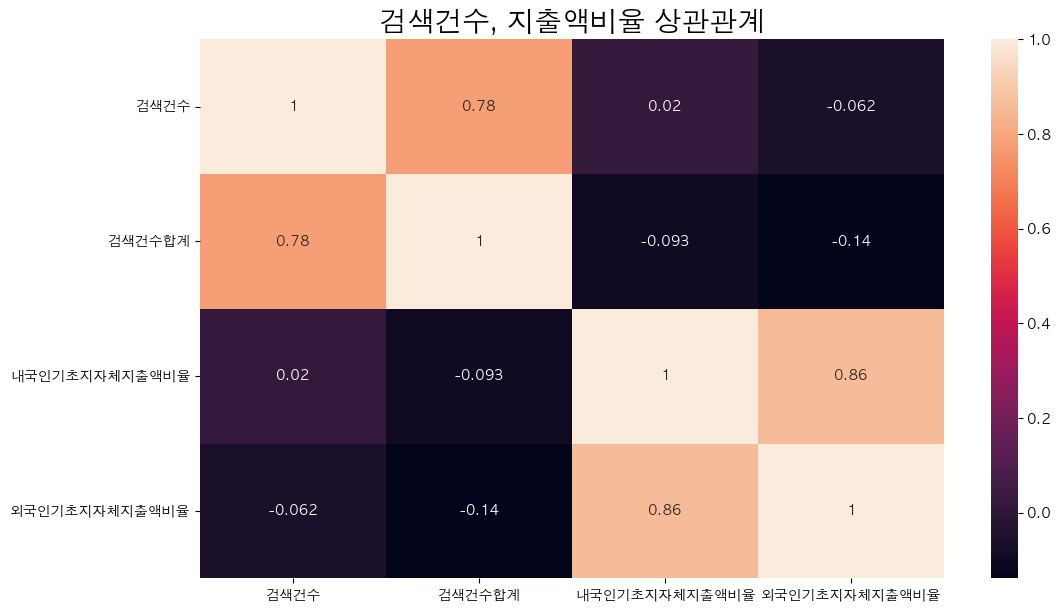

In [124]:
gu2['검색건수합계'] = gu_middle2.groupby('시/군/구')[['검색건수합계']].sum()
gu2.reset_index(inplace=True)
gu2['내국인기초지자체지출액비율'] = seoul_ps['기초지자체 지출액 비율']
gu2['외국인기초지자체지출액비율'] = seoul_foreign_ps['기초지자체 지출액 비율']

ax = sns.heatmap(gu2.corr(), annot=True)
plt.title('검색건수, 지출액비율 상관관계', fontsize=20)
plt.show() 

- 쇼핑을 제거해도 상관관계가 영 나아지지 않았다...

In [136]:
import math
ts_mean = seoul_ts.groupby('중분류').mean()[['지출액']]
ts_mean['지출액'] = round(ts_mean['지출액']/1000,2)

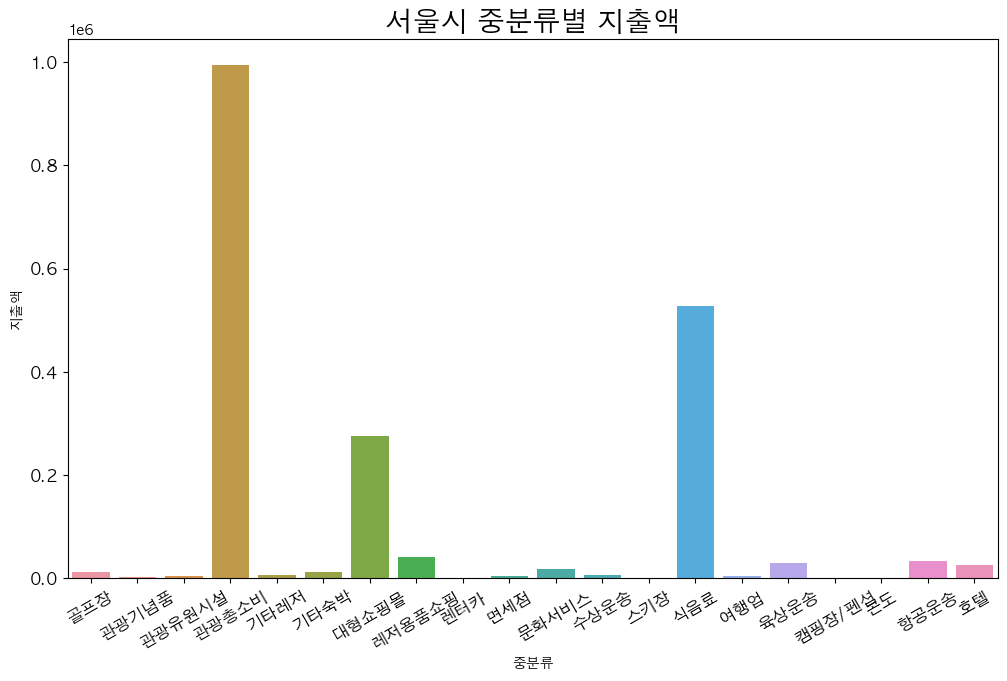

In [137]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = ts_mean,
           x=ts_mean.index,
           y=ts_mean['지출액']);
plt.title('서울시 중분류별 지출액', size=20)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

- 서울은 쇼핑이 굉장히 지표가 높기 때문에, 분류별 분석의 무의미하다....

# 제주시

In [138]:
# 검색건수 개수
gu_middle = jeju_nav.groupby(['시/군/구', '중분류 카테고리']).count()[['검색건수']]
gu_middle.reset_index(drop=False, inplace=True)

# 검색건수 합계
gu_middle_sum = jeju_nav.groupby(['시/군/구', '중분류 카테고리']).sum()[['검색건수']]
gu_middle_sum.reset_index(drop=False, inplace=True)
gu_middle['검색건수합계'] = gu_middle_sum['검색건수']

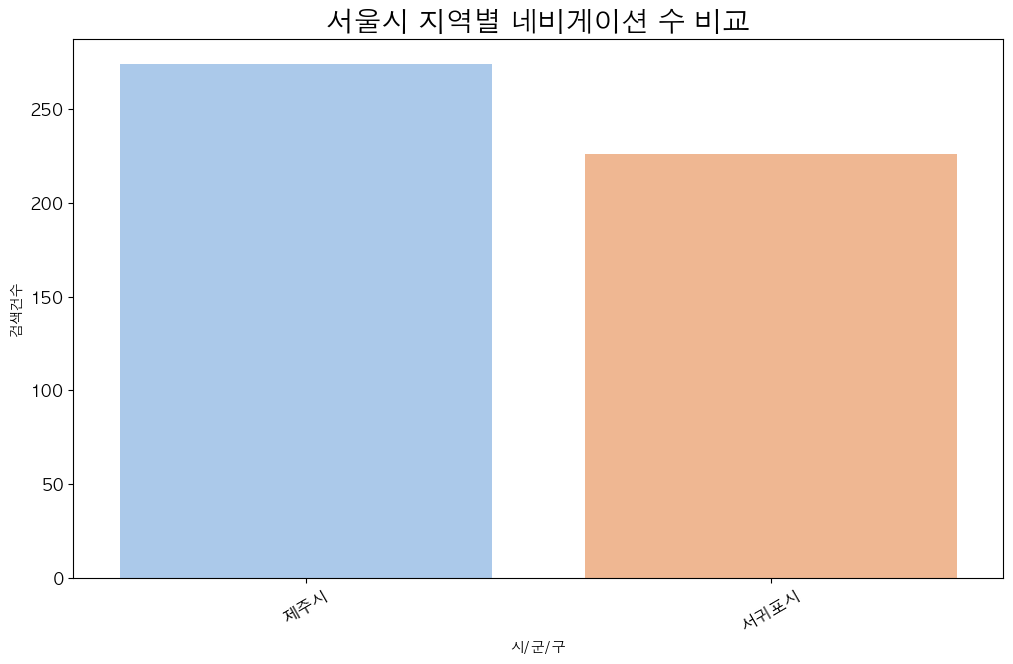

In [139]:
gu = jeju_nav.groupby(['시/군/구']).count()[['검색건수']]
gu.sort_values(by='검색건수', ascending=False, inplace=True)
# 총발생횟수 비교
rcParams['figure.figsize'] = 12,7
sns.barplot(data = gu,
           x=gu.index,
           y=gu['검색건수']);
plt.title('서울시 지역별 네비게이션 수 비교', size=20)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

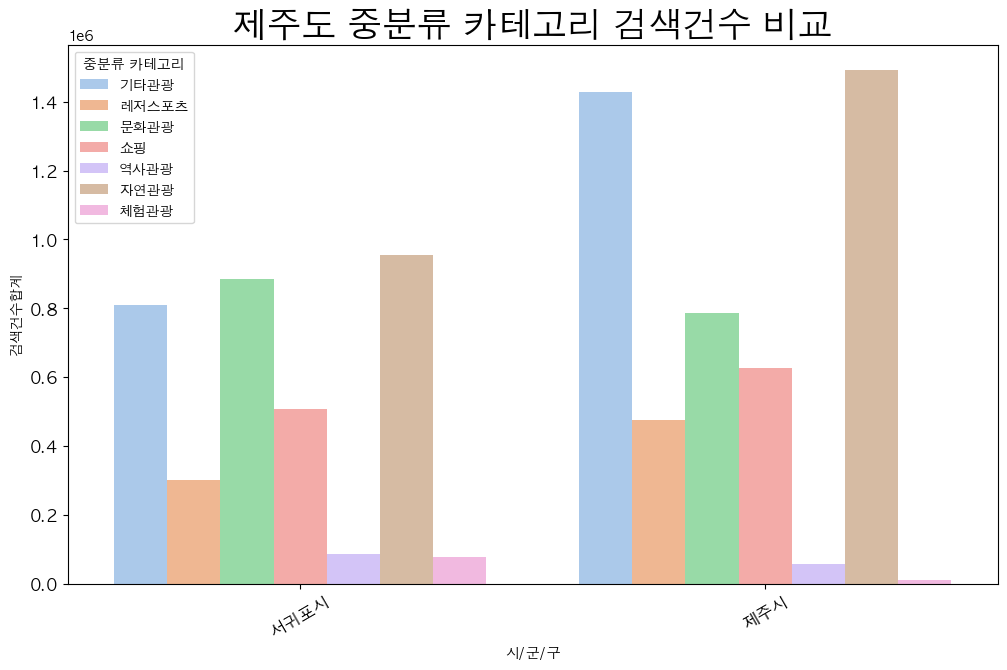

In [148]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = gu_middle,
           x=gu_middle['시/군/구'],
           y=gu_middle['검색건수합계'], hue='중분류 카테고리');
plt.title('제주도 중분류 카테고리 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

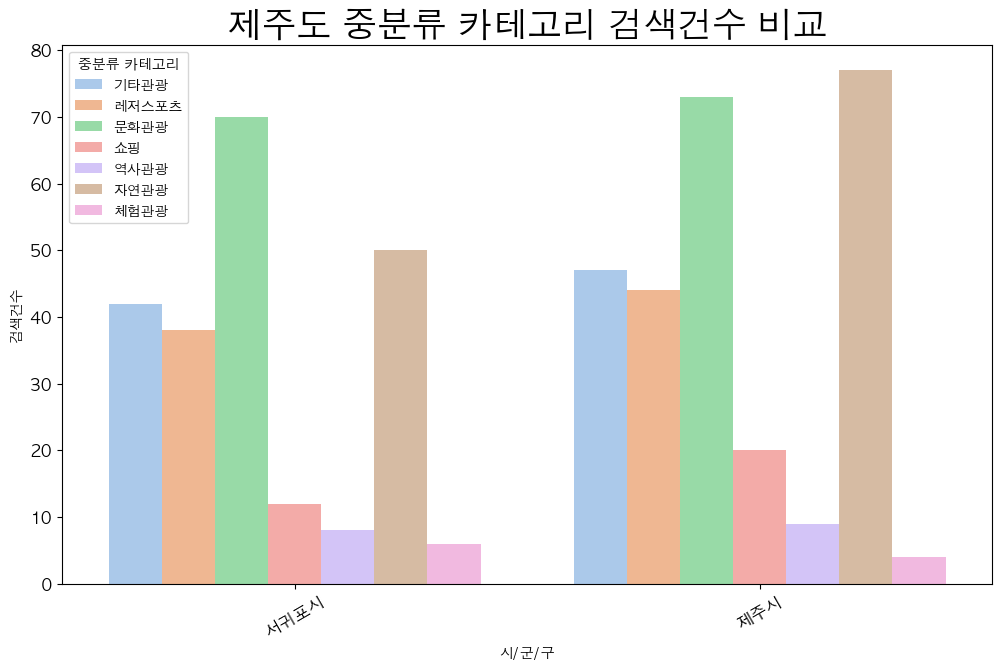

In [149]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = gu_middle,
           x=gu_middle['시/군/구'],
           y=gu_middle['검색건수'], hue='중분류 카테고리');
plt.title('제주도 중분류 카테고리 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

In [152]:
gu_middle['장소당검색건수'] = gu_middle['검색건수합계']//gu_middle['검색건수']

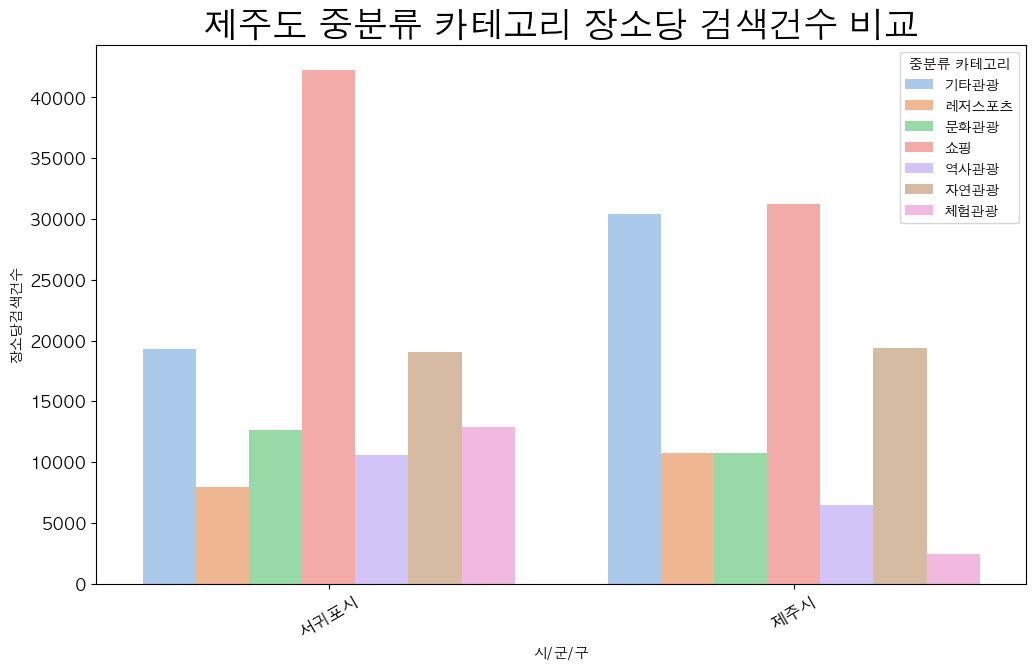

In [154]:
rcParams['figure.figsize'] = 12,7
sns.barplot(data = gu_middle,
           x=gu_middle['시/군/구'],
           y=gu_middle['장소당검색건수'], hue='중분류 카테고리');
plt.title('제주도 중분류 카테고리 장소당 검색건수 비교', size=25)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()

In [155]:
jeju_nav

,순위,관광지명,광역시/도,시/군/구,도로명주소,중분류 카테고리,소분류 카테고리,검색건수
0,1,제주국제공항,제주특별자치도,제주시,제주 제주시 공항로 2-0,기타관광,교통시설,797036
1,2,동문재래시장,제주특별자치도,제주시,제주 제주시 관덕로14길 20-0,쇼핑,시장,294248
2,3,서귀포매일올레시장,제주특별자치도,서귀포시,제주 서귀포시 중앙로62번길 18-0,쇼핑,시장,262585
3,4,성산일출봉,제주특별자치도,서귀포시,제주 서귀포시 일출로 284-12,자연관광,자연경관(산),192790
4,5,함덕해수욕장,제주특별자치도,제주시,제주 제주시 조함해안로 525-0,자연관광,자연경관(하천/해양),192665
...,...,...,...,...,...,...,...,...
495,496,법화사,제주특별자치도,서귀포시,제주 서귀포시 하원북로35번길 15-28,역사관광,종교성지,1586
496,497,아이스뮤지엄,제주특별자치도,제주시,제주 제주시 은수길 69-0,문화관광,전시시설,1577
497,497,제주공룡랜드휴업(2024년03월재개장예정),제주특별자치도,제주시,제주 제주시 광령평화2길 1-0,문화관광,테마공원,1577
498,499,오라CC입구벚꽃길,제주특별자치도,제주시,제주 제주시,기타관광,데이트코스,1576


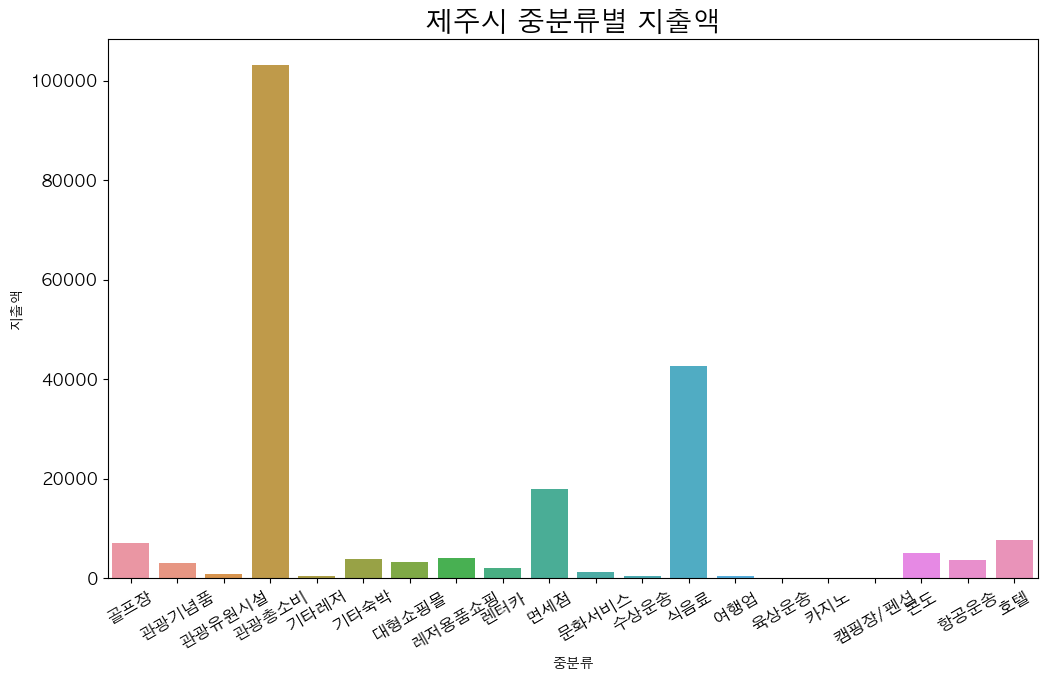

In [157]:
import math
ts_mean = jeju_ts.groupby('중분류').mean()[['지출액']]
ts_mean['지출액'] = round(ts_mean['지출액']/1000,2)

rcParams['figure.figsize'] = 12,7
sns.barplot(data = ts_mean,
           x=ts_mean.index,
           y=ts_mean['지출액']);
plt.title('제주시 중분류별 지출액', size=20)
plt.xticks(rotation=30,size=12)
plt.yticks(size=12)
plt.show()